# ObsSea4Clim - Density map v1




# **Curious to see where are the oceans most observed?**


The notebook "ObsSea4Clim - Density Map v1" provides an interactive tool to visualize and evaluate the density of measurements for selected parameters. Users can filter the data by parameter (e.g., sea temperature, salinity, or currents), geographic region, time period, and depth making it easy to assess data availability and coverage.
Data are extracted from:

https://ercompwebapps.emodnet-physics.eu/erddap/index.html

Run the code cell below to install and import all the necessary libraries. It also defines two dictionaries to convert user input into the format needed to make requests to ERDDAP.

In [ ]:
!pip install scipy

In [ ]:
# @title
# %%capture
!pip install netcdf4 cartopy xarray pandas ipywidgets matplotlib requests h5netcdf

import requests
import os
import io
import netCDF4
import numpy as np
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from datetime import datetime
from dateutil.relativedelta import relativedelta
import io
import warnings

warnings.filterwarnings('ignore')

params = {
  'Electrical conductivity': 'CNDC',
 'Dissolved oxygen': 'DOXY',
 'Bathymetric depth': 'BATH',
 'Total alkalinity': 'ALKW',
 'Absolute salinity': 'ASAL',
 'Sea density (sigma-theta)': 'DENS',
 'Total chlorophyll-a': 'CPHL',
 'Air temperature in dry bulb': 'DRYT',
 'Daily precipitation rate (liquid water equivalent)': 'PRRD',
 'Hourly precipitation rate (liquid water equivalent)': 'PRRT',
 'Sound velocity': 'SVEL',
 'Current to direction relative true north': 'HCDT',
 'Nitrate (no3-n)': 'NTRA',
 'Nitrite (no2-n)': 'NTIW',
 'Sea level expressed as pressure': 'PREX',
 'Radial sea water velocity away from instrument': 'RDVA',
 'Silicate (sio4-si)': 'SLCW',
 'Sea temperature from oxygen sensor': 'TEMP_DOXY',
 'Wind strength and direction': 'EWSB',
 'Gust wind speed': 'GSPD',
 'Sound pressure level at 63hz (20s integration time)': 'SPL63',
 'Bottom-top current component': 'VCSP',
 'Wave direction rel. true north': 'VDIR',
 'Average height highest 1/10 wave (h1/10)': 'VH110',
 'Spectral moments (0,2) wave period (tm02)': 'VTM02',
 'Raw current meter output parameters': 'LERR',
 'Longwave/atmospheric incoming radiation': 'LINC',
 'Ph at 25 \\u00b0c and 0 dbar': 'PH25',
 'River flow rate': 'RVFL',
 'Sea temperature from tsg': 'SSJT',
 'Light attenuation coefficient': 'TUR2',
 'Turbidity of water in the water body': 'TUR6',
 'Average height highest 1/3 wave (h1/3)': 'VAVH',
 'Wave spectrum peak energy (smax)': 'VEPK',
 'Beaufort wind force': 'WBFO',
 'Colored dissolved organic matter': 'CDOM',
 'Horizontal velocity of the water column (currents)': 'RFVL',
 'Average period highest 1/3 wave (t1/3)': 'VAVT',
 'Depth of the deepest trough': 'VMNL',
 'Significant wave height': 'VTDH',
 'Air temperature in wet bulb': 'WETT',
 'Chlorophyll-a fluorescence': 'FLU2',
 'Fluorescence': 'FLU3',
 'Dew_point_temperature': 'DEWT',
 'Currents': 'EWCT_NSCT',
 'Co2 partial pressure': 'PCO2',
 'Sound pressure level at 125hz (20s integration time)': 'SPL125',
 'Swell direction rel true n.': 'SWDR',
 'Mean wave from direction': 'THETA1',
 'Wave principal direction at spectral peak': 'VPED',
 'Maximum wave period (tmax)': 'VTMX',
 'Wave period at spectral peak / peak period (tp)': 'VTPK',
 'Surface incoming photosynthetic active radiation': 'LGH4',
 'Net total incoming radiation': 'NRAD',
 'Average period highest 1/10 wave (t1/10)': 'VT110',
 'Hourly rainfall rate': 'HOURLY_RAIN',
 'Dissolved organic nitrogen': 'NODW',
 'Nitrate + nitrite': 'NTRZ',
 'Dissolved oxygen (deprecated)': 'UDOX',
 'Wave directional spreading at spectral peak': 'VPSP',
 'Average zero crossing wave period (tz)': 'VTZA',
 'Maximum zero crossing wave height (hmax)': 'VZMX',
 'Direction of radial vector away from instrument': 'DRVA',
 'Gust wind from direction relative true north': 'GDIR',
 'Horizontal current speed': 'HCSP',
 'Ph': 'PHPH',
 'Total incoming radiation': 'RDIN',
 'Sound pressure level (20s integration time)': 'SPL',
 'Directional spread around theta2': 'STHETA2',
 'Swell height': 'SWHT',
 'Principal wave from direction': 'THETA2',
 'Light transmission': 'TUR3',
 'Generic average wave period': 'VGTA',
 'Light backscattering': 'BACKSCATTERING',
 'Wave direction': 'GWDR',
 'Height_above_mean_sea_level': 'ALTS',
 'Total chlorophyll': 'CHLT',
 'Immerged incoming photosynthetic active radiation': 'LGHT',
 'Phosphate (po4-p)': 'PHOW',
 'Sea potential temperature': 'POTENTIAL_TEMP',
 'Residual sea level (observed - predicted)': 'SLVR',
 'Spectral moments (-1,0) wave period (tm-10)': 'VTM10',
 'Oxygen saturation': 'OSAT',
 'Practical salinity': 'PSAL',
 'Sea sigma-theta': 'SIGMA_THETA',
 'Swell period': 'SWPR',
 'Estimated maximum wave height': 'VEMH',
 'Max period highest 1/3 wave': 'VMAT',
 'Period of the highest wave': 'VTZM',
 'South-north wind component': 'WSPN',
 'Vertical velocity of the water column (currents)': 'LRZA',
 'Shortwave/solar incoming radiation': 'SINC',
 'Water surface height above a specific datum': 'SLEV',
 'Sound pressure level at 2khz (20s integration time)': 'SPL2k',
 'Sea temperature': 'TEMP',
 'Turbidity': 'TURMGL',
 'Mean wave direction from (mdir)': 'VMDR',
 'Height of the highest crest': 'VMXL',
 'Wind from direction relative true north': 'WDIR',
 'Horizontal wind speed': 'WSPD',
 'Atmospheric pressure at altitude': 'ATMP',
 'Atmospheric pressure at sea level': 'ATMS',
 'Dissolved organic carbon': 'CORW',
 'Phycobolin pigment concentrations in the water column': 'PHYC',
 'Relative humidity': 'RELH',
 'Maximum crest trough wave height (hc,max)': 'VCMX',
 'Directional spread around theta1': 'STHETA1',
 'Atmospheric pressure hourly tendency': 'ATPT',
 'Number of bacteria cells in sea water': 'BCCW',
 'Spectral significant wave height (hm0)': 'VHM0',
 'Average zero crossing wave height (hzm)': 'VHZA',
 'Spect. moment(0,2) wave period': 'VSMC',
 'Wave scalar spectral density': 'VSPEC1D',
 'Maximum wave steepness': 'VST1',
 'Wave height and period statistics': 'WVST',
 'Co2 fugacity': 'FCO2',
 'Dissolved nitrogen': 'NGDW',
 'Light scattering': 'SCATTERING',
 'Dissolved inorganic carbon': 'TICW',
 'Total suspended matter': 'TSMP',
 'Generic significant wave height (hs)': 'VGHS',
 'West-east wind component': 'WSPE',
 'Wind to direction relative true north': 'WTODIR',
 'Observed instantaneous water level': 'WLEV'
        }

proj_map = {
    "Mercator": ccrs.PlateCarree(),
}

selected_proj = None

depth_bins={
       0: [0, 5],
       5: [5, 10],
       10: [10, 20],
       20: [20, 30],
       30: [30, 40],
       40: [40, 50],
       50: [50, 100],
       100: [100, 250],
       250:[250, 500],
       500: [500, 1000],
       1000: [1000, 1500],
       1500: [1500, 2000],
       2000: [2000, 2500],
       2500: [2500, 10000]
        }

Run the code cells below to create the sliders and drop down menus, then select the filters you want to apply when collecting the data.

Please use the format 'YYYY-MM' for the time range.

In [2]:
# @title

params_density_resp = requests.get('https://erddap.s4oceandata.eu/erddap/griddap/index.json')

params_density_json = params_density_resp.json()
params_density = params_density_json['table']['rows']
params_density = [dataset[-1] for dataset in params_density_json['table']['rows'] if 'DENSITY_' in dataset[-1] and 'test' not in dataset[-1] and 'v2' not in dataset[-1]]

cleaned_params = {k: v for k, v in params.items() if v in [p.replace('DENSITY_', '') for p in params_density]}

colorbars = {
    "Green to red" : [(0, '#ffffff'), (0.0000000001, '#238823'), (0.5, '#FFBF00'), (1, '#D2222D')],
    "Color blind safe": [(0, '#ffffff'), (0.0000001, '#377eb8'), (0.5, '#ff7f00'), (1,'#4daf4a')],
                  # (0.3, '#f781bf'), (0.4, '#a65628'), (0.5,'#984ea3'),
                  # (0.6, '#999999'), (0.7, '#e41a1c'), (1,'#dede00')],
    "Dark": [(0, '#120128'), (0.0000000001, '#36084D'), (0.34, '#357DED'), (0.67, '#56EEF4'), (1, '#9FF7BF')],

}

selected_var = None
pr_ts = None

def update_selected_param(change):
    global selected_var
    selected_var = change.new
    selected_var = cleaned_params[selected_var]

def update_selected_pr_ts(change):
    global pr_ts
    pr_ts = change.new

dropdown_param = widgets.Dropdown(
    options=cleaned_params.keys(),
    description='Parameter:',
    value= list(cleaned_params.keys())[0]
)
dropdown_param.observe(update_selected_param, names='value')

pr_ts_dropdown = widgets.Dropdown(
    options=['Time series', 'Profile', 'Both'],
    description='Type:',
)
pr_ts_dropdown.observe(update_selected_pr_ts, names='value')

min_latitude_slider = widgets.FloatSlider(value=-90, min=-90, max=90, step=0.5, description='Min latitude:', style={'description_width': 'initial'})
max_latitude_slider = widgets.FloatSlider(value=90, min=-90, max=90, step=0.5, description='Max latitude:', style={'description_width': 'initial'})
min_longitude_slider = widgets.FloatSlider(value=-180, min=-180, max=180, step=0.5, description='Min longitude:', style={'description_width': 'initial'})
max_longitude_slider = widgets.FloatSlider(value=180, min=-180, max=180, step=0.5, description='Max longitude:', style={'description_width': 'initial'})

start_time_input = widgets.Text(
    placeholder='2024-01',
    description='Start month:',
    disabled=False
)

end_time_input = widgets.Text(
    placeholder='2024-06',
    description='End month:',
    disabled=False
)

colors_dropdown = widgets.Dropdown(
    options=colorbars.keys(),
    description='Color bar:',
    value="Green to red"
)

hbox_1 = HBox([dropdown_param])
hbox_2 = HBox([min_latitude_slider, max_latitude_slider])
hbox_3 = HBox([min_longitude_slider, max_longitude_slider])
hbox_4 = HBox([start_time_input, end_time_input])
hbox_5 = HBox([colors_dropdown])

vbox = VBox([hbox_1,hbox_2, hbox_3, hbox_4, hbox_5])
vbox

In [3]:
# @title
if selected_var is None:
  selected_var = list(cleaned_params.values())[0]

available_depths_resp = requests.get(f'https://erddap.s4oceandata.eu/erddap/griddap/DENSITY_{selected_var}.json?depth')

available_depths_json = available_depths_resp.json()
available_depths_mins = [d[0] for d in available_depths_json['table']['rows']]
available_depths_maxs = [d[1] for d in depth_bins.values() if d[0] in available_depths_mins]

min_depth_slider = widgets.SelectionSlider(
    options=available_depths_mins,
    value=available_depths_mins[0],
    description='Min depth:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)
max_depth_slider = widgets.SelectionSlider(
    options=available_depths_maxs,
    value=available_depths_maxs[-1],
    description='Max depth:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

VBox([min_depth_slider, max_depth_slider])

After selecting the desired parameter and filters, run the code cell below to retrive the data and generate the density map.

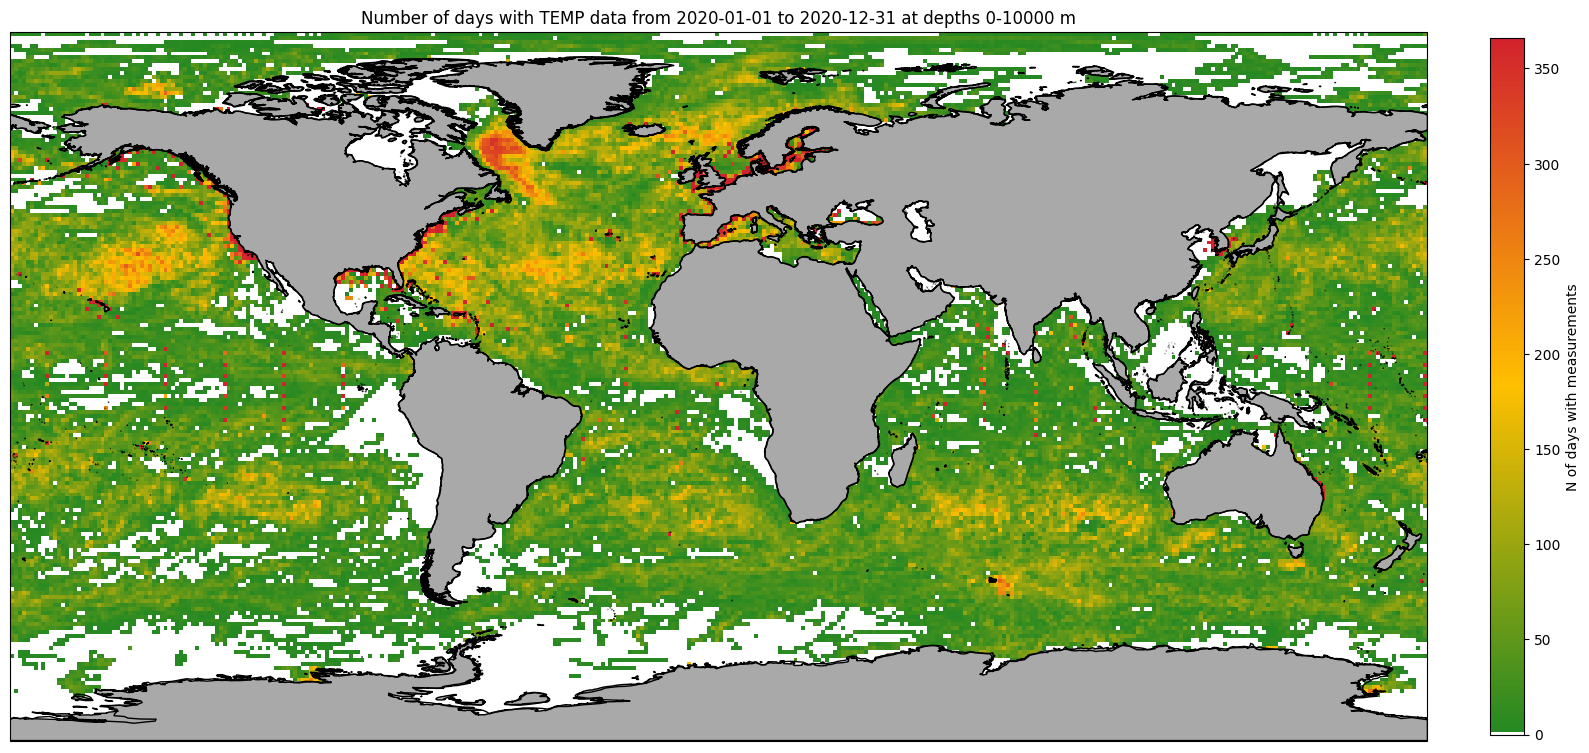

In [ ]:
# @title
if selected_proj is None:
  selected_proj = list(proj_map.values())[0]

if selected_var is None:
  selected_var = list(cleaned_params.values())[0]

min_depth = min_depth_slider.value
max_depth = max_depth_slider.value

selected_depths = [d for d in available_depths_mins if d >= min_depth and d < max_depth]

min_lat = min_latitude_slider.value
max_lat = max_latitude_slider.value
min_lon = min_longitude_slider.value
max_lon = max_longitude_slider.value

min_time = start_time_input.value
max_time = end_time_input.value

if min_time is None or min_time == '':
  min_time = '2024-01'

if max_time is None or max_time == '':
  max_time = '2024-06'

max_time = datetime.strptime(max_time, '%Y-%m') #- relativedelta(seconds=1)
max_time_str = str(max_time - relativedelta(seconds=1))[:10]
max_time = max_time.strftime('%Y-%m-%d')

color_bar = colors_dropdown.value

def generate_monthly_time_tuples(dt_min, dt_max):
    if relativedelta(dt_max, dt_min).months < 1 and dt_min.year == dt_max.year:
        return [(dt_min, dt_max)]
    times = []
    next_month_start = (dt_min + relativedelta(months=1)).replace(day=1, hour=0, minute=0, second=0, microsecond=0)
    first_end = min(next_month_start, dt_max)
    times.append((dt_min, first_end))
    current_start = next_month_start
    while current_start < dt_max:
        next_month_start = (current_start + relativedelta(months=1)).replace(day=1, hour=0, minute=0, second=0, microsecond=0)
        current_end = min(next_month_start, dt_max)
        times.append((current_start, current_end))
        current_start = next_month_start
    return times

def generate_yearly_time_tuples(dt_min, dt_max):
    if dt_min is None: dt_min = datetime(1900,1,1,0,0,0)
    if dt_max is None: dt_max = datetime.now()
    if dt_min.year == dt_max.year:
        return [(dt_min, dt_max)]
    times = []
    current_start = dt_min
    while current_start < dt_max:
        year_start = current_start
        year_end = datetime(year_start.year, 12, 31, 23, 59, 59)
        year_end = min(year_end, dt_max)
        times.append((year_start, year_end))
        current_start = datetime(year_start.year + 1, 1, 1)
    return times

min_time_dt = datetime.strptime(min_time, '%Y-%m')
max_time_dt = datetime.strptime(max_time, '%Y-%m-%d')

tot_days = (max_time_dt - min_time_dt).days

time_tuples = generate_monthly_time_tuples(min_time_dt, max_time_dt)
time_tuples = [(t[0].strftime('%Y-%m'), t[1].strftime('%Y-%m')) for t in time_tuples]

all_df = pd.DataFrame()

for time_tup in time_tuples:
    min_t = time_tup[0]
    max_t = time_tup[1]

    url = f'https://erddap.s4oceandata.eu/erddap/griddap/DENSITY_{selected_var}.nc?DENSITY%5B({selected_depths[0]}):1:({selected_depths[-1]})%5D%5B({min_t}-01):1:({max_t}-01)%5D%5B({min_lat}):1:({max_lat})%5D%5B({min_lon}):1:({max_lon})%5D'
    resp_netcdf = requests.get(url)

    try:
        ds = xr.open_dataset(io.BytesIO(resp_netcdf.content), decode_times=False)

        df = ds.to_dataframe().reset_index()
        df_agg = df.groupby(['latitude', 'longitude'])['DENSITY'].max().reset_index()

        if all_df.empty:
            all_df = df_agg
        else:
            all_df = pd.merge(all_df, df_agg, on=['latitude', 'longitude'], how='outer', suffixes=('_old', '_new'))
            all_df['DENSITY'] = all_df['DENSITY_old'].fillna(0) + all_df['DENSITY_new'].fillna(0)
            all_df = all_df.drop(columns=['DENSITY_old', 'DENSITY_new'])

    except Exception as e:
        print(f"Error processing data for {min_t} to {max_t}: {e}")
        print(resp_netcdf)
        print(str(resp_netcdf.content)[:200])


if not all_df.empty:

    def display_map(ax, plt):
        plt.gcf().set_size_inches(16, 9)
        plt.tight_layout()
        plt.show()

    def create_map(df):
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1, projection=selected_proj)

        grid_dimension = 1
        lon_bins = np.arange(-180, 181, grid_dimension)
        lat_bins = np.arange(-90, 91, grid_dimension)

        heatmap, lon_edges, lat_edges = np.histogram2d(
            df['longitude'], df['latitude'],
            bins=[lon_bins, lat_bins],
            weights=df['DENSITY']
        )

        colors = colorbars[color_bar]
        custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', colors)

        pcm = ax.pcolormesh(
            lon_edges, lat_edges, heatmap.T,
            cmap=custom_cmap,
            transform=ccrs.PlateCarree(),
            vmin=0, vmax=tot_days
        )

        shpfilename = shpreader.natural_earth(resolution='10m', category='physical', name='land')
        reader = shpreader.Reader(shpfilename)
        land_geoms = list(reader.geometries())
        ax.add_geometries(
            land_geoms, crs=ccrs.PlateCarree(),
            facecolor='darkgrey', edgecolor='black'
        )
        ax.coastlines()

        selected_proj_name = {v: k for k, v in proj_map.items()}.get(selected_proj)

        if selected_proj_name == "South Polar":
            ax.set_extent([-180, 180, -90, -40], crs=ccrs.PlateCarree())
        elif selected_proj_name == "North Polar":
            ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
        else:
            ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

        cbar = plt.colorbar(pcm, ax=ax, orientation='vertical', fraction=0.023, pad=0.041)
        cbar.set_label('N of days with measurements')

        depth_range = f"{min_depth}-{max_depth}"
        ax.set_title(f'Number of days with {selected_var} data from {min_time}-01 to {max_time_str} at depths {depth_range} m')

        return ax, plt
    ax, plt = create_map(all_df)
    display_map(ax, plt)
else:
    print('No available data for the selected time range')

This notebook has been funded by Ocean observations and indicators for climate and assessments, ObsSea4Clim, Grant agreement ID: 101136548, [10.3030/101136548](https://cordis.europa.eu/project/id/101136548) in collaboration with European Marine Observation and Data Network, EMODnet (https://emodnet.ec.europa.eu/en)

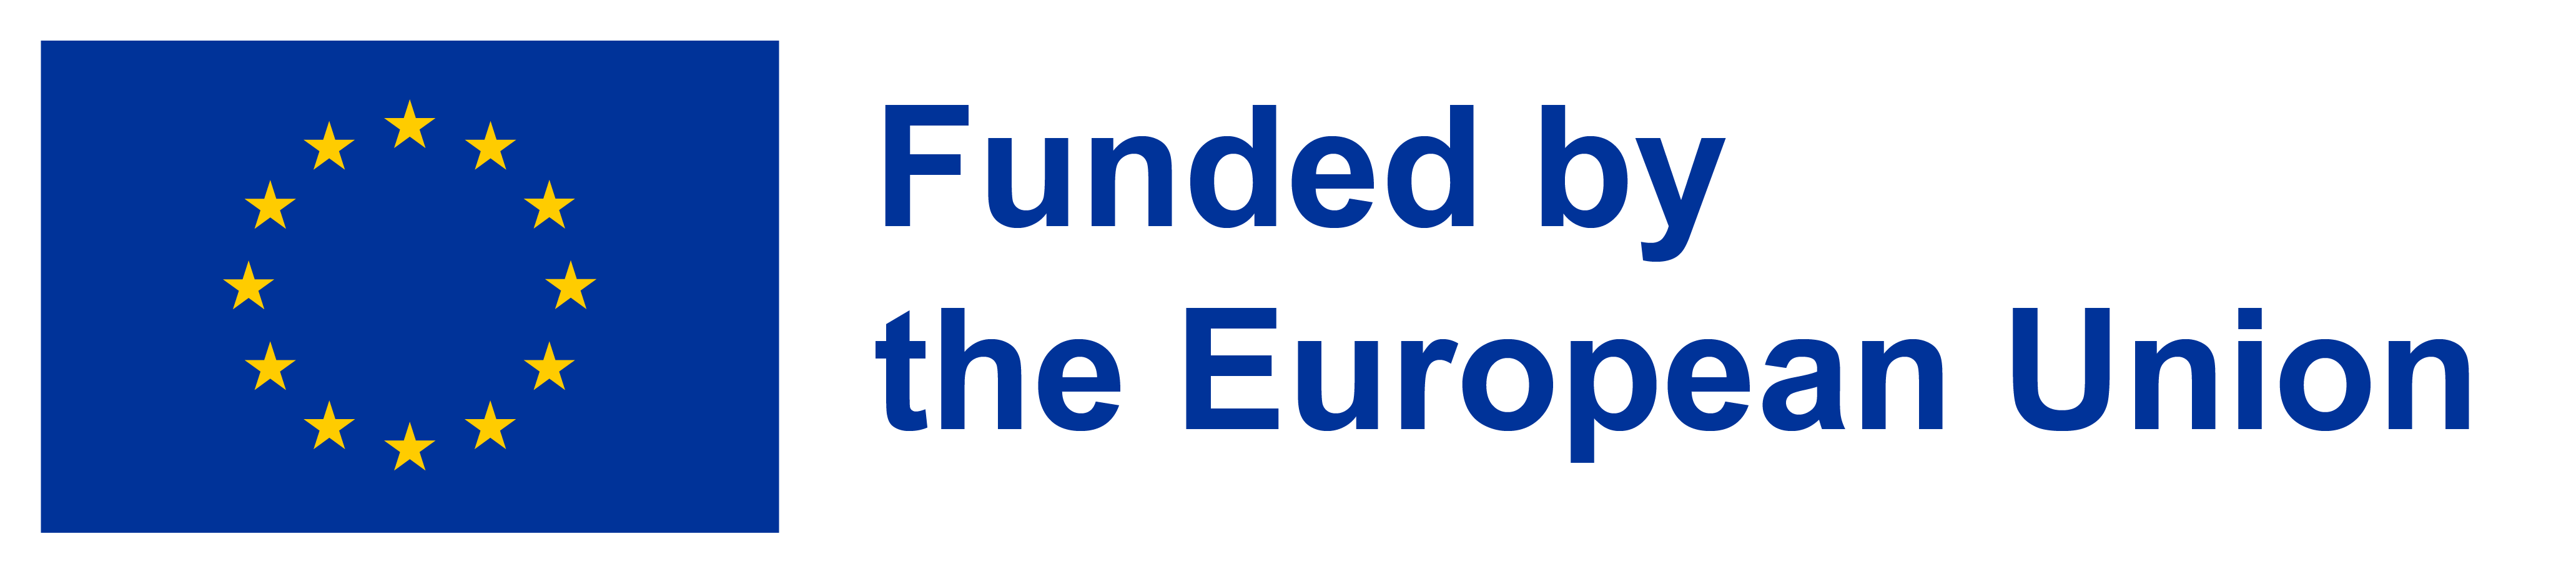